In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
#import matplotlib.pyplot as plt
#import seaborn as sns

In [30]:
df = pd.read_csv('ww-data-long-2023-05-02.csv')
# remove rows with NaN values
df = df.dropna()
df=df[df["Daily mean"]!=0]
df=df[df["Year"]==2022]

In [31]:
days = ["Monday" ,"Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday" , "Sunday"]
days_norm = [f"{day}_norm" for day in days]
for day in days:
    df[f"{day}_norm"] =np.where(df["Daily mean"]!=0, df[day] / df["Daily mean"],1)
df

,Year,Metabolite,Site ID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,...,Weekday mean,Weekend mean,Daily mean,Monday_norm,Tuesday_norm,Wednesday_norm,Thursday_norm,Friday_norm,Saturday_norm,Sunday_norm
0,2022,amphetamine,AT001,AT,Graz,24.00,20.90,24.22,27.86,28.27,...,22.37,26.03,24.46,0.973017,0.907604,0.981194,0.854456,0.990188,1.139002,1.155765
1,2022,amphetamine,AT002,AT,Hall-Wattens,9.01,13.61,9.28,11.82,11.08,...,9.82,10.87,10.42,1.085413,0.656430,0.864683,1.306142,0.890595,1.134357,1.063340
2,2022,amphetamine,AT004,AT,Innsbruck,10.18,9.80,11.70,16.02,14.86,...,13.14,13.98,13.62,0.980176,1.428047,0.747430,0.719530,0.859031,1.176211,1.091043
3,2022,amphetamine,AT005,AT,Kapfenberg,32.16,28.14,30.94,21.49,21.35,...,24.42,24.40,24.41,0.975010,0.530930,1.317493,1.152806,1.267513,0.880377,0.874642
4,2022,amphetamine,AT006,AT,Klagenfurt,6.74,6.87,12.77,9.57,11.62,...,6.76,10.46,8.87,0.886133,0.749718,0.759865,0.774521,1.439684,1.078918,1.310034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2022,methamphetamine,SI004,SI,Ljubljana,8.26,8.58,13.42,13.39,16.15,...,8.86,13.35,11.42,0.913310,0.852890,0.723292,0.751313,1.175131,1.172504,1.414186
505,2022,methamphetamine,SI005,SI,Maribor,1.01,0.95,0.93,1.10,0.22,...,0.74,0.63,0.67,0.373134,0.373134,1.507463,1.417910,1.388060,1.641791,0.328358
506,2022,methamphetamine,SI006,SI,Novo mesto,0.58,0.22,0.23,0.45,0.22,...,0.34,0.28,0.30,0.733333,0.700000,1.933333,0.733333,0.766667,1.500000,0.733333
508,2022,methamphetamine,TR001,TR,Adana,38.77,40.43,48.42,51.39,55.33,...,39.88,50.95,46.21,1.053235,0.875135,0.838996,0.874919,1.047825,1.112097,1.197360


In [32]:
unique_drugs = df["Metabolite"].unique()
mean_day = df.groupby(["Metabolite"])[days_norm].mean()


mean_day=mean_day.reset_index()
mean_day=mean_day.melt(id_vars="Metabolite", value_vars=["Monday_norm","Tuesday_norm", "Wednesday_norm","Thursday_norm","Friday_norm","Saturday_norm","Sunday_norm"])
fig = px.line(mean_day, x="variable", y="value", color='Metabolite')
fig.show()
mean_day

,Metabolite,variable,value
0,MDMA,Monday_norm,1.204687
1,amphetamine,Monday_norm,0.997251
2,cannabis,Monday_norm,1.070170
3,cocaine,Monday_norm,0.992751
4,ketamine,Monday_norm,1.111896
5,methamphetamine,Monday_norm,0.988892
6,MDMA,Tuesday_norm,0.752092
7,amphetamine,Tuesday_norm,1.013851
8,cannabis,Tuesday_norm,1.051550
9,cocaine,Tuesday_norm,0.846674


In [13]:
mdma = df[(df["Metabolite"] == "cocaine") & (df["Year"] == 2022)]
# group by country and compute the mean of the normalized values for each day
country_mdma_norm = mdma.groupby("Country")[days_norm].sum() / mdma.groupby("Country")[days_norm].count()
# add a mean row
country_mdma_norm.loc["mean"] = country_mdma_norm.mean()
country_mdma_norm


,Monday_norm,Tuesday_norm,Wednesday_norm,Thursday_norm,Friday_norm,Saturday_norm,Sunday_norm
Country,,,,,,,
AT,0.834583,0.800770,0.801640,0.897556,1.020419,1.372799,1.272313
BE,1.259615,0.759600,0.805398,1.106368,1.085596,0.959708,1.023719
CH,0.836881,0.771210,0.981630,0.868014,1.132510,1.173634,1.236100
CY,1.193332,0.836799,1.043348,0.583932,0.596550,1.151703,1.594317
CZ,1.296235,0.900785,0.833661,1.011887,0.840723,1.010897,1.105847
DE,0.956449,0.799220,0.765600,0.884024,0.890669,1.293249,1.426105
DK,0.938349,0.678057,0.678026,0.625628,1.123025,1.589913,1.367004
EE,1.515688,1.160099,0.646007,0.773313,0.943133,0.790641,1.171095
ES,0.981540,0.893760,0.786936,0.819525,0.928093,1.306888,1.283247


In [15]:
# compute correlation between countries and the mean
corr = country_mdma_norm.corrwith(country_mdma_norm.loc["mean"], axis=1)
corr = corr.sort_values(ascending=True)
mdma = df[(df["Metabolite"] == "amphetamine") & (df["Year"] == 2022)]
# group by city and compute the mean of the normalized values for each day
mdma = mdma.groupby("City")[days_norm].sum() / mdma.groupby("City")[days_norm].count()
mdma.loc["mean"] = mdma.mean()
corr_city = mdma.corrwith(mdma.loc["mean"], axis=1)
corr_city = corr_city.sort_values(ascending=True)

mdma.reset_index(inplace=True)

top4=mdma[mdma["City"].isin(corr_city.index[:4])]
top4=top4.melt(id_vars="City", value_vars=["Monday_norm","Tuesday_norm", "Wednesday_norm","Thursday_norm","Friday_norm","Saturday_norm","Sunday_norm"])

import plotly.express as px

top4
fig = px.line(top4, x="variable", y="value", color='City')
fig.show()

In [16]:
top4

,City,variable,value
0,Agia Napa,Monday_norm,0.701278
1,Kapfenberg,Monday_norm,0.975010
2,Paphos,Monday_norm,1.361919
3,Salo,Monday_norm,0.742838
4,Agia Napa,Tuesday_norm,1.304313
5,Kapfenberg,Tuesday_norm,0.530930
6,Paphos,Tuesday_norm,1.485465
7,Salo,Tuesday_norm,1.101296
8,Agia Napa,Wednesday_norm,2.130990
9,Kapfenberg,Wednesday_norm,1.317493


In [13]:
mdma.columns

Index(['Year', 'Metabolite', 'Site ID', 'Country', 'City', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Weekday mean', 'Weekend mean', 'Daily mean', 'Monday_norm',
       'Tuesday_norm', 'Wednesday_norm', 'Thursday_norm', 'Friday_norm',
       'Saturday_norm', 'Sunday_norm'],
      dtype='object')

In [8]:
days

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [9]:
country_mdma_norm

,Monday_norm,Tuesday_norm,Wednesday_norm,Thursday_norm,Friday_norm,Saturday_norm,Sunday_norm
Country,,,,,,,
AT,1.210836,0.739498,0.608660,0.572004,0.825945,1.356938,1.684743
BE,1.525692,0.728789,0.596782,0.870902,0.593435,0.912493,1.772020
CH,0.992179,0.528731,0.511153,0.414677,0.426954,1.786197,2.340741
CY,2.010156,0.875448,0.677294,0.445812,0.394409,0.839241,1.763240
CZ,1.361120,1.152836,0.905116,0.735128,0.850470,0.843122,1.152603
DE,1.414594,0.670768,0.475508,0.460836,0.429411,1.190461,2.333565
DK,1.326838,0.502222,0.376752,0.345299,0.522051,1.646496,2.279316
EE,1.482514,1.229560,0.674158,0.682040,0.706380,0.886848,1.335977
ES,1.203934,0.800866,0.526887,0.545500,0.810079,1.186510,1.926171


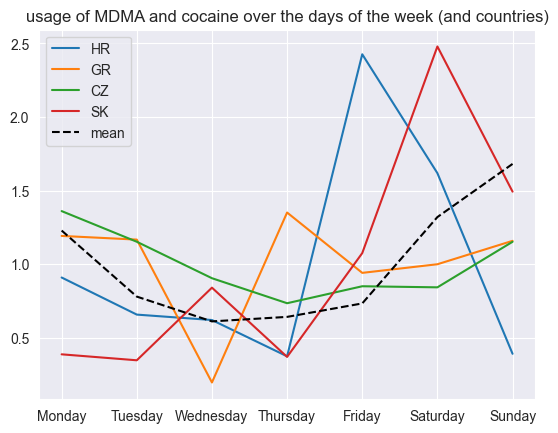

In [6]:
# compute correlation between countries and the mean
corr = country_mdma_norm.corrwith(country_mdma_norm.loc["mean"], axis=1)
corr = corr.sort_values(ascending=True)
# plot the first few countries together with the mean
for country in corr.index[:4]:
    plt.plot(days, country_mdma_norm.loc[country], label=country)
plt.plot(days, country_mdma_norm.loc["mean"], label="mean", c="black", linestyle="dashed")
plt.title("usage of MDMA and cocaine over the days of the week (and countries)")
plt.legend()

In [7]:
mdma = df[(df["Metabolite"] == "MDMA") & (df["Year"] == 2022)]
# group by city and compute the mean of the normalized values for each day
mdma = mdma.groupby("City")[days_norm].sum() / mdma.groupby("City")[days_norm].count()
mdma.loc["mean"] = mdma.mean()

In [14]:
corr_city = mdma.corrwith(mdma.loc["mean"], axis=1)
corr_city = corr_city.sort_values(ascending=True)
# plot the first few countries together with the mean
for city in corr_city.index[:6]:
    plt.plot(days, mdma.loc[city], label=city)
plt.plot(days, mdma.loc["mean"], label="mean", c="black", linestyle="dashed")
plt.legend()
plt.title("cities with weird usage of MDMA over the days of the week")


KeyError: 'mean'

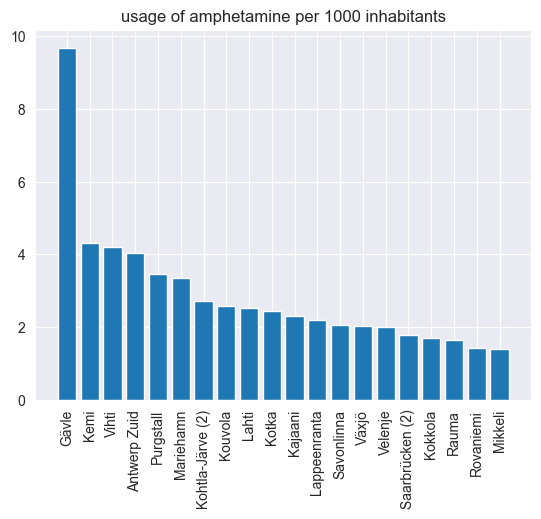

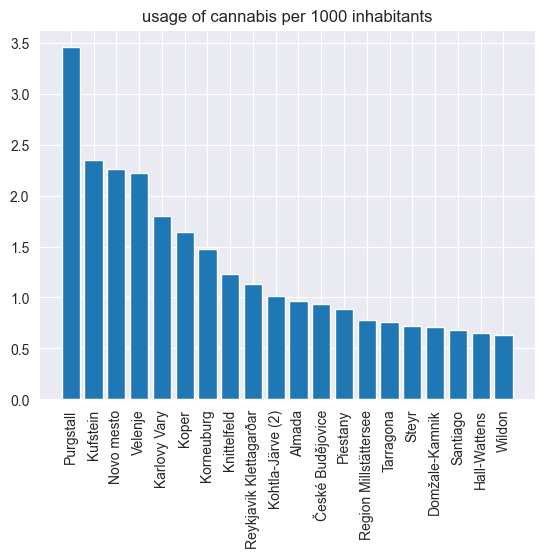

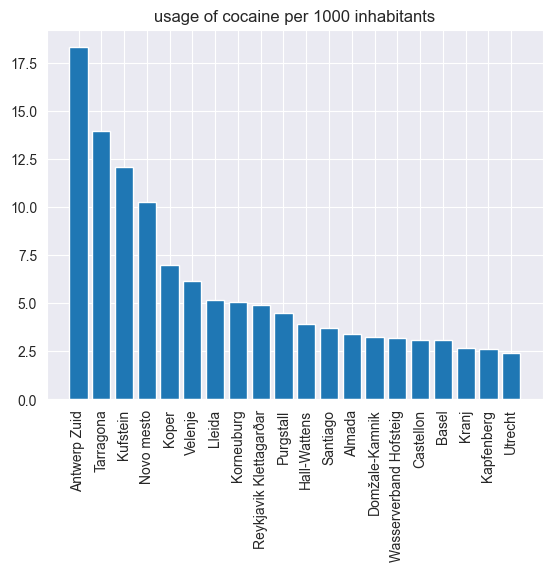

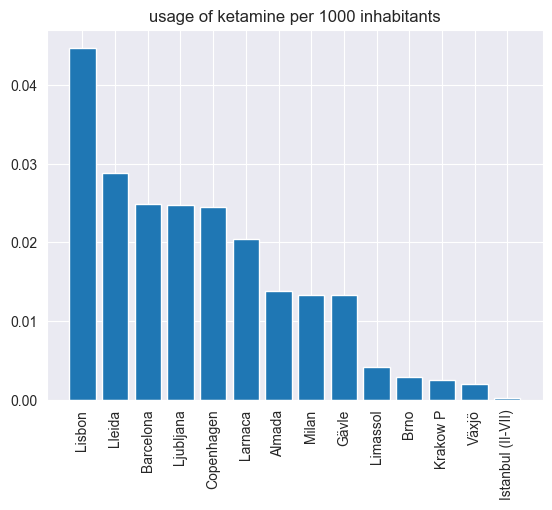

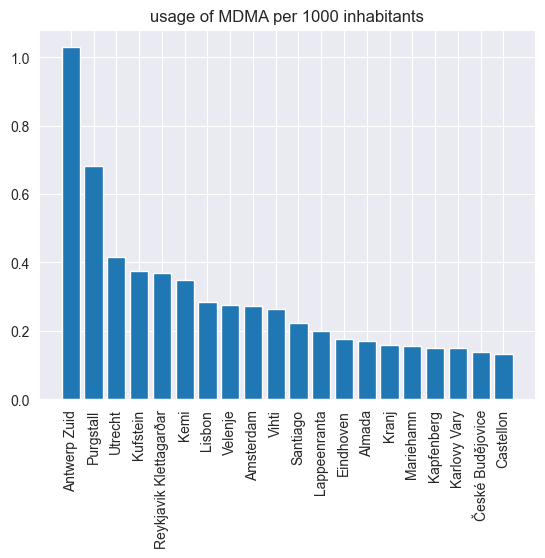

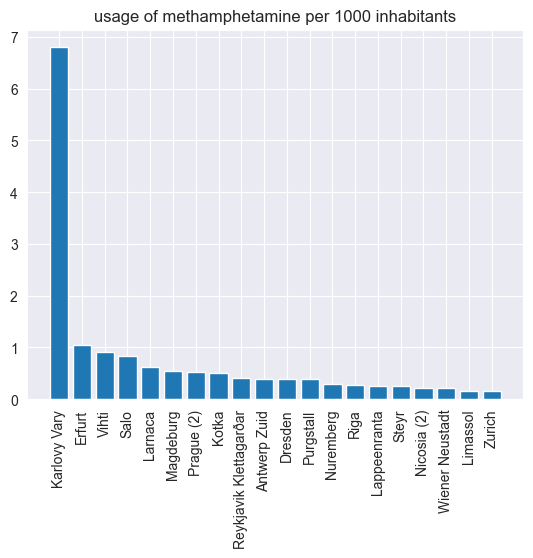

In [30]:
small_df = df[df["Year"] == 2022]
# keep only columns Country, City and Metabolite
small_df = small_df[["Country", "City", "Metabolite", "Daily mean"]]

city_df = pd.read_csv("ww-sites-2023-05-02.csv")
city_df = city_df[["City", "Population"]]

# join the two dataframes
small_df = small_df.join(city_df.set_index("City"), on="City")
small_df["Daily mean / Population"] = small_df["Daily mean"] / small_df["Population"] * 1000
small_df = small_df.dropna()

for drug in small_df["Metabolite"].unique():
    small_df_drug = small_df[small_df["Metabolite"] == drug]
    small_df_drug = small_df_drug.sort_values(by="Daily mean / Population", ascending=False)
    # plot first 20 cities
    small_df_drug = small_df_drug[:20]
    plt.bar(small_df_drug["City"], small_df_drug["Daily mean / Population"])
    plt.xticks(rotation=90)
    plt.title(f"usage of {drug} per 1000 inhabitants")
    # plt.yscale("log")
    plt.show()

In [11]:
df

,Year,Metabolite,Site ID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,...,Weekday mean,Weekend mean,Daily mean,Monday_norm,Tuesday_norm,Wednesday_norm,Thursday_norm,Friday_norm,Saturday_norm,Sunday_norm
0,2022,amphetamine,AT001,AT,Graz,24.00,20.90,24.22,27.86,28.27,...,22.37,26.03,24.46,0.973017,0.907604,0.981194,0.854456,0.990188,1.139002,1.155765
1,2022,amphetamine,AT002,AT,Hall-Wattens,9.01,13.61,9.28,11.82,11.08,...,9.82,10.87,10.42,1.085413,0.656430,0.864683,1.306142,0.890595,1.134357,1.063340
2,2022,amphetamine,AT004,AT,Innsbruck,10.18,9.80,11.70,16.02,14.86,...,13.14,13.98,13.62,0.980176,1.428047,0.747430,0.719530,0.859031,1.176211,1.091043
3,2022,amphetamine,AT005,AT,Kapfenberg,32.16,28.14,30.94,21.49,21.35,...,24.42,24.40,24.41,0.975010,0.530930,1.317493,1.152806,1.267513,0.880377,0.874642
4,2022,amphetamine,AT006,AT,Klagenfurt,6.74,6.87,12.77,9.57,11.62,...,6.76,10.46,8.87,0.886133,0.749718,0.759865,0.774521,1.439684,1.078918,1.310034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,2011,methamphetamine,CZ002,CZ,České Budějovice,170.18,169.00,193.88,167.00,145.98,...,181.64,170.88,175.49,1.006610,1.172318,0.969742,0.963018,1.104792,0.951621,0.831842
3068,2011,methamphetamine,ES001,ES,Barcelona,6.43,8.12,9.31,10.50,10.66,...,7.34,9.24,8.43,0.773428,0.884935,0.762752,0.963227,1.104389,1.245552,1.264531
3074,2011,methamphetamine,IT002,IT,Milan,44.46,41.37,48.55,54.00,63.47,...,43.10,52.86,48.68,0.933443,0.892975,0.913311,0.849836,0.997329,1.109285,1.303821
3078,2011,methamphetamine,NO001,NO,Oslo,235.00,212.60,231.06,186.16,295.50,...,232.77,253.80,244.79,1.235590,1.024184,0.960007,0.868500,0.943911,0.760489,1.207157
